In [19]:
import matplotlib.pyplot as plt

#AUCplot = plt.figure()


Perceptron
LDA
SVM
Logistic Regression


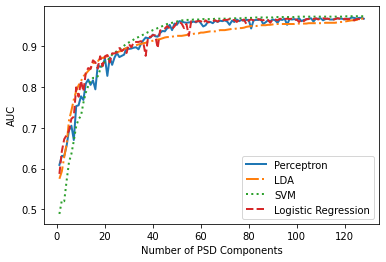

In [27]:
modelOptions = ["Perceptron",
                    "LDA", 
                    "SVM",
                    "Logistic Regression"
                   ]

lineStyles = ["-",
                    "-.", 
                    ":",
                    "--"
                   ]

x = list(range(1, 129))

for selectedModel, lineStyle in zip(modelOptions, lineStyles):
    print(selectedModel)
    #Read log file for AUCs and number of PSD components.
    file = open("../results/{}_AUC.csv".format(selectedModel), "r")
    data = file.readlines()
    y = []
    for line in data[2:]:
        y.append(float(line.split(",")[1].split("\n")[0]))
    plt.plot(x, y, label = selectedModel, linestyle = lineStyle, linewidth = 2)
    plt.legend()
    plt.ylabel('AUC')
    plt.xlabel('Number of PSD Components')